In [1]:
from sklearn.datasets import load_files       
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import cv2

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    bur_files = np.array(data['filenames'])
    bur_targets = np_utils.to_categorical(np.array(data['target']), 2)
    return bur_files, bur_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('Bur_Images/train/color')
validation_files, validation_targets = load_dataset('Bur_Images/validation/color')
test_files, test_targets = load_dataset('Bur_Images/test/color')

# load list of bur classes
bur_classes = [item[23:-1] for item in sorted(glob("Bur_Images/train/color/*/"))]

# print statistics about the dataset
print('There are %d total Bur classes.' % len(bur_classes))
print bur_classes
print('There are %s total Bur images.\n' % len(np.hstack([train_files, test_files, validation_files])))
print('There are %d training Bur images.' % len(train_files))
print('There are %d validation Bur images.' % len(validation_files))
print('There are %d test Bur images.\n'% len(test_files))
print('There are %d training Bur targets.' % len(train_targets))
print train_targets.sum(axis=0)

Using TensorFlow backend.


There are 2 total Bur classes.
['damaged', 'good']
There are 524 total Bur images.

There are 431 training Bur images.
There are 51 validation Bur images.
There are 42 test Bur images.

There are 431 training Bur targets.
[172. 259.]


In [13]:
#path_estudo = 'Bur_Images/train/color/damaged/20180826-093218DamagedBur.png'
path_estudo = train_files[121]
imagem_estudo = cv2.imread(path_estudo)
print type(imagem_estudo)
print 'RGB shape: ', imagem_estudo.shape        # Rows, cols, channels
print 'img.dtype: ', imagem_estudo.dtype
print 'img.size: ', imagem_estudo.size
print path_estudo

<type 'numpy.ndarray'>
RGB shape:  (480, 640, 3)
img.dtype:  uint8
img.size:  921600
Bur_Images/train/color/good/20180826-174632GoodBur.png


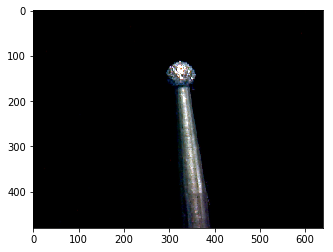

In [14]:
plt.imshow(imagem_estudo)
plt.show()

In [22]:
def find_pixel(img, r_query, g_query, b_query):

   # rgb = img.convert('RGB')
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            r, g, b, = imagem_estudo[y,x]
            if r > r_query and g > g_query and b > b_query:
                return (y,x)

ab , cd = (find_pixel(imagem_estudo, 3, 3, 3))

In [23]:
def separa_head(img, ab, cd):
    a = 0
    b = 0
    c = 0
    d = 0
    a = ab - 20
    b = ab + 70
    c = cd - 45
    d = cd + 45
    crop_img = img[a:b, c:d]
    return crop_img
    

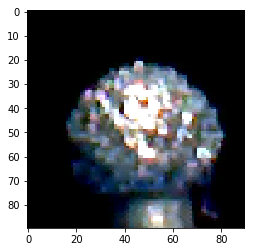

In [24]:
nova_img = separa_head(imagem_estudo, ab, cd)
plt.imshow(nova_img)
plt.show()

In [25]:
new_name = 'Bur_check' + path_estudo[10:]
cv2.imwrite(new_name,nova_img,[cv2.IMWRITE_PNG_COMPRESSION, 9])

True

In [26]:
nova_img.shape

(90, 90, 3)

In [28]:
from keras.preprocessing import image                  
from tqdm import tqdm

def save_image(img_path):
    ab = 0
    cd = 0
    img = cv2.imread(img_path)
    ab , cd = (find_pixel(img, 1, 1, 1))
    nova_img = separa_head(img, ab, cd)
    
    # Save images to check    
    new_name = 'Bur_check' + img_path[10:]
    cv2.imwrite(new_name,nova_img,[cv2.IMWRITE_PNG_COMPRESSION, 9])

def save_images(img_paths):
    [save_image(img_path) for img_path in tqdm(img_paths)]
    

In [ ]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True  


save_images(train_files)
save_images(validation_files)
save_images(test_files)

  6%|▌         | 24/431 [00:06<01:54,  3.56it/s]